In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
# Step 1: Load the data
data = pd.read_csv('hcvdat0_SetNAtoMissing.csv')
data

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,id
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106,12.1,69.0,1
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74,15.6,76.5,2
2,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86,33.2,79.3,3
3,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80,33.8,75.7,4
4,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76,29.9,68.7,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,56,650.9,68.5,611
611,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63,35.9,71.3,612
612,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,67,64.2,82.0,613
613,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52,50.0,71.0,614


In [9]:
data.isnull().sum()

Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
id           0
dtype: int64

In [11]:
# to find the columns with missing values
columns_with_missing = data.columns[data.isnull().any()].tolist()

print("Column names with missing values:")
print(columns_with_missing)

Column names with missing values:
['ALB', 'ALP', 'ALT', 'CHOL', 'PROT']


In [16]:
data[columns_with_missing].mean()

ALB     41.620195
ALP     68.283920
ALT     28.450814
CHOL     5.368099
PROT    72.044137
dtype: float64

In [15]:
# Get the median of column 'A'
median_A = data[columns_with_missing].median()

print(f"Median of columns:\n{median_A}")

Median of columns:
ALB     41.95
ALP     66.20
ALT     23.00
CHOL     5.30
PROT    72.20
dtype: float64


In [4]:
data = pd.read_csv('hcvdat0_withoutMissing.csv')

In [5]:
# data['EqualWidthBinning'] = pd.cut(data['Age'], bins=3)

# data['EqualFreqBinning'] = pd.qcut(data['Age'], q=3)

bins = [18, 39, 59, float('inf')]
labels = ['18-39', '40-59', '60-80']
data['AgeBinning'] = pd.cut(data['Age'], bins=bins, labels=labels)
data.sort_values(by='Age')

,ALT,ALB,ALP,CHOL,PROT,Category,Age,Sex,AST,BIL,CHE,CREA,GGT,id,AgeBinning
541,87.0,41.0,66.2,3.900000,75.0,1=Hepatitis,19,m,67.0,12.0,7.55,62,65.0,542,18-39
542,38.9,47.0,19.1,3.200000,70.1,1=Hepatitis,23,m,164.2,17.0,7.09,79,90.4,543,18-39
543,63.3,42.0,38.2,4.280000,70.5,1=Hepatitis,25,m,187.7,14.0,6.00,67,40.2,544,18-39
544,10.5,45.0,27.5,3.200000,74.5,1=Hepatitis,27,m,37.8,10.0,8.77,55,35.9,545,18-39
564,2.4,41.0,43.1,5.420000,66.5,2=Fibrosis,29,m,83.5,6.0,11.49,55,130.0,565,18-39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538,22.8,20.3,84.0,3.190000,47.8,0s=suspect Blood Donor,74,m,43.0,5.7,4.91,52,218.3,539,60-80
584,114.0,36.0,66.2,5.368099,72.0,2=Fibrosis,75,f,125.0,14.0,6.65,57,177.0,585,60-80
315,25.2,29.2,48.9,2.790000,58.1,0=Blood Donor,76,m,27.2,8.3,4.52,127,18.3,316,60-80
316,28.6,38.0,97.1,5.560000,73.8,0=Blood Donor,76,m,33.1,14.1,4.83,90,117.6,317,60-80


In [49]:
data['EqualFreqBinning'].value_counts()

EqualFreqBinning
(18.999, 43.0]    223
(43.0, 52.0]      207
(52.0, 77.0]      185
Name: count, dtype: int64

In [50]:
data['EqualWidthBinning'].value_counts()

EqualWidthBinning
(38.333, 57.667]    367
(18.942, 38.333]    145
(57.667, 77.0]      103
Name: count, dtype: int64

In [6]:
data['CustomBinning'].value_counts()

CustomBinning
40-59    380
18-39    160
60-80     75
Name: count, dtype: int64

In [6]:
data.head()

,ALT,ALB,ALP,CHOL,PROT,Category,Age,Sex,AST,BIL,CHE,CREA,GGT,id,AgeBinning
0,7.7,38.5,52.5,3.23,69.0,0=Blood Donor,32,m,22.1,7.5,6.93,106,12.1,1,18-39
1,18.0,38.5,70.3,4.80,76.5,0=Blood Donor,32,m,24.7,3.9,11.17,74,15.6,2,18-39
2,36.2,46.9,74.7,5.20,79.3,0=Blood Donor,32,m,52.6,6.1,8.84,86,33.2,3,18-39
3,30.6,43.2,52.0,4.74,75.7,0=Blood Donor,32,m,22.6,18.9,7.33,80,33.8,4,18-39
4,32.6,39.2,74.1,4.32,68.7,0=Blood Donor,32,m,24.8,9.6,9.15,76,29.9,5,18-39


In [7]:
# One-hot encode the Sex column
data = pd.get_dummies(data, columns=['Sex'], drop_first=True)
data.head()

,ALT,ALB,ALP,CHOL,PROT,Category,Age,AST,BIL,CHE,CREA,GGT,id,AgeBinning,Sex_m
0,7.7,38.5,52.5,3.23,69.0,0=Blood Donor,32,22.1,7.5,6.93,106,12.1,1,18-39,True
1,18.0,38.5,70.3,4.80,76.5,0=Blood Donor,32,24.7,3.9,11.17,74,15.6,2,18-39,True
2,36.2,46.9,74.7,5.20,79.3,0=Blood Donor,32,52.6,6.1,8.84,86,33.2,3,18-39,True
3,30.6,43.2,52.0,4.74,75.7,0=Blood Donor,32,22.6,18.9,7.33,80,33.8,4,18-39,True
4,32.6,39.2,74.1,4.32,68.7,0=Blood Donor,32,24.8,9.6,9.15,76,29.9,5,18-39,True


In [8]:
# One-hot encode the Age column
data = pd.get_dummies(data, columns=['AgeBinning'], drop_first=True)

In [9]:
data.head()

,ALT,ALB,ALP,CHOL,PROT,Category,Age,AST,BIL,CHE,CREA,GGT,id,Sex_m,AgeBinning_40-59,AgeBinning_60-80
0,7.7,38.5,52.5,3.23,69.0,0=Blood Donor,32,22.1,7.5,6.93,106,12.1,1,True,False,False
1,18.0,38.5,70.3,4.80,76.5,0=Blood Donor,32,24.7,3.9,11.17,74,15.6,2,True,False,False
2,36.2,46.9,74.7,5.20,79.3,0=Blood Donor,32,52.6,6.1,8.84,86,33.2,3,True,False,False
3,30.6,43.2,52.0,4.74,75.7,0=Blood Donor,32,22.6,18.9,7.33,80,33.8,4,True,False,False
4,32.6,39.2,74.1,4.32,68.7,0=Blood Donor,32,24.8,9.6,9.15,76,29.9,5,True,False,False


In [10]:
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
# from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier as DTC

from sklearn.metrics import confusion_matrix, classification_report

In [11]:
# Separate features and target
X = data.drop(['id', 'Category', 'Age'], axis=1)
y = data['Category']

In [12]:
# Verify shapes of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (615, 13)
Shape of y: (615,)


In [35]:
print(X.count())
X.head()

ALT                 615
ALB                 615
ALP                 615
CHOL                615
PROT                615
AST                 615
BIL                 615
CHE                 615
CREA                615
GGT                 615
Sex_m               615
AgeBinning_40-59    615
AgeBinning_60-80    615
dtype: int64


,ALT,ALB,ALP,CHOL,PROT,AST,BIL,CHE,CREA,GGT,Sex_m,AgeBinning_40-59,AgeBinning_60-80
0,7.7,38.5,52.5,3.23,69.0,22.1,7.5,6.93,106,12.1,True,False,False
1,18.0,38.5,70.3,4.80,76.5,24.7,3.9,11.17,74,15.6,True,False,False
2,36.2,46.9,74.7,5.20,79.3,52.6,6.1,8.84,86,33.2,True,False,False
3,30.6,43.2,52.0,4.74,75.7,22.6,18.9,7.33,80,33.8,True,False,False
4,32.6,39.2,74.1,4.32,68.7,24.8,9.6,9.15,76,29.9,True,False,False


In [13]:
print(y.count())
y.head()

615


0    0=Blood Donor
1    0=Blood Donor
2    0=Blood Donor
3    0=Blood Donor
4    0=Blood Donor
Name: Category, dtype: object

In [14]:
y.value_counts()

Category
0=Blood Donor             533
3=Cirrhosis                30
1=Hepatitis                24
2=Fibrosis                 21
0s=suspect Blood Donor      7
Name: count, dtype: int64

In [15]:
# Create a decision tree classifier
clf = DTC()

# Define a 10-fold cross-validation strategy
kf = KFold(n_splits=10, shuffle=True, random_state=1992)

# Perform cross-validation and get predictions
try:
    y_pred = cross_val_predict(clf, X, y, cv=kf)

    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(y, y_pred)

    # Print the confusion matrix
    print("Confusion Matrix:")
    print(conf_matrix)

    # Print the classification report
    print("\nClassification Report:")
    print(classification_report(y, y_pred))

except ValueError as e:
    print("Error:", e)

Confusion Matrix:
[[519   1   6   5   2]
 [  4   1   1   1   0]
 [  8   0   7   6   3]
 [  6   0   4   7   4]
 [  0   0   2   5  23]]

Classification Report:
                        precision    recall  f1-score   support

         0=Blood Donor       0.97      0.97      0.97       533
0s=suspect Blood Donor       0.50      0.14      0.22         7
           1=Hepatitis       0.35      0.29      0.32        24
            2=Fibrosis       0.29      0.33      0.31        21
           3=Cirrhosis       0.72      0.77      0.74        30

              accuracy                           0.91       615
             macro avg       0.57      0.50      0.51       615
          weighted avg       0.90      0.91      0.90       615



<table width="100%"><tr><td bgcolor=#00BFF></td></tr></table>

# KMEANS

In [16]:
from sklearn.cluster import KMeans

In [48]:
data = pd.read_csv('hcvdat0_Standadized.csv')
data.head()

,Sex = m,ALT,ALB,ALP,CHOL,PROT,Age,AST,BIL,CHE,CREA,GGT,Category,id
0,0.793897,-0.815011,-0.540208,-0.613066,-1.903127,-0.563913,-1.532369,-0.383381,-0.198074,-0.574266,0.496684,-0.501878,0=Blood Donor,1
1,0.793897,-0.410295,-0.540208,0.080989,-0.505666,0.825430,-1.532369,-0.304809,-0.381065,1.348063,-0.146518,-0.437847,0=Blood Donor,2
2,0.793897,0.304836,0.914106,0.252553,-0.149625,1.344118,-1.532369,0.538328,-0.269237,0.291689,0.094683,-0.115863,0=Blood Donor,3
3,0.793897,0.084796,0.273516,-0.632562,-0.559073,0.677233,-1.532369,-0.368271,0.381396,-0.392914,-0.025918,-0.104886,0=Blood Donor,4
4,0.793897,0.163382,-0.419015,0.229158,-0.932915,-0.619487,-1.532369,-0.301787,-0.091330,0.432237,-0.106318,-0.176235,0=Blood Donor,5


In [41]:
data.isnull().sum()

Sex = m     0
ALT         0
ALB         0
ALP         0
CHOL        0
PROT        0
Age         0
AST         0
BIL         0
CHE         0
CREA        0
GGT         0
Category    0
id          0
dtype: int64

In [49]:
# Separate features and target
X = data.drop(['id', 'Category'], axis=1)
y = data['Category']

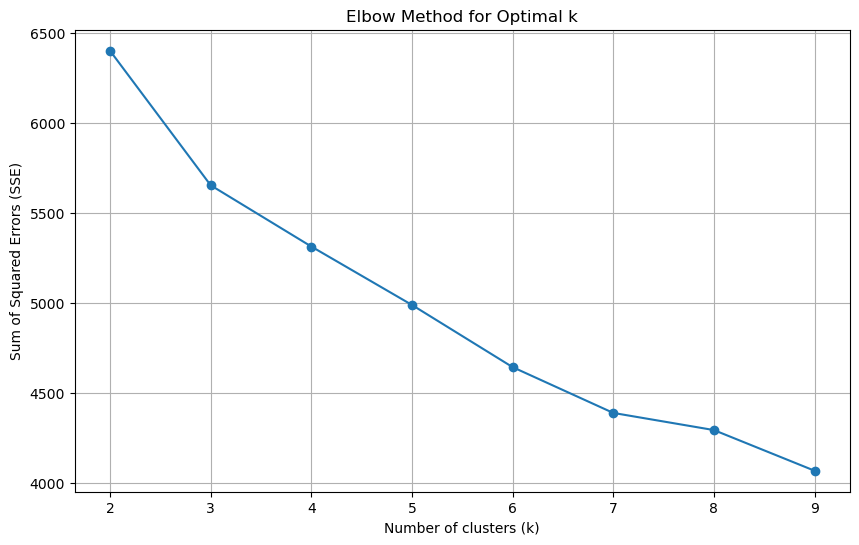

In [50]:
SSE = []
centroid = []
k_range = range(2, 10)  # you can adjust the range as needed
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    SSE.append(kmeans.inertia_)  # Inertia is the SSE
    centroid.append(kmeans.cluster_centers_)

# Step 5: Plot the SSE to create the elbow chart
plt.figure(figsize=(10, 6))
plt.plot(k_range, SSE, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [26]:
[*zip(k_range, SSE)]

[(2, 5556.478013890417),
 (3, 4978.258499562343),
 (4, 4583.732737127177),
 (5, 4333.458844108763),
 (6, 4023.8898533055763),
 (7, 3767.721519033335),
 (8, 3609.108291207261),
 (9, 3376.2789489437346),
 (10, 3051.165901650884),
 (11, 2969.1884366925538),
 (12, 2802.733166487831),
 (13, 2765.5631883809733),
 (14, 2628.045112643141)]

In [29]:
[*zip(k_range, centroid)]

[(2,
  array([[-1.15826954e-04,  1.17107373e-01, -6.33546666e-02,
           6.77228271e-02,  7.83673496e-02, -1.29455267e-01,
          -1.25129755e-01,  1.07704083e-01, -5.66548586e-02,
          -1.24975244e-01,  2.73195876e-01,  6.11683849e-01,
           6.06529210e-01],
         [ 2.04276628e-03, -2.06534822e+00,  1.11734594e+00,
          -1.19438441e+00, -1.38211507e+00,  2.28312016e+00,
           2.20683387e+00, -1.89950837e+00,  9.99185687e-01,
           2.20410884e+00,  3.03030303e-02,  7.27272727e-01,
           7.27272727e-01]])),
 (3,
  array([[ 0.05541174, -1.85300418,  1.78476468, -1.08933743, -0.99767733,
           2.75305876,  2.8924322 , -1.98427662,  1.63364862,  3.02236959,
           0.04347826,  0.7826087 ,  0.73913043],
         [ 0.24145455,  0.41953159,  0.130536  ,  0.46861774,  0.49316729,
          -0.02973985, -0.10292065,  0.5815198 , -0.00793001,  0.0210087 ,
           0.26433121,  0.62101911,  0.70063694],
         [-0.27730647, -0.32055333, -0.2951

<table width="100%"><tr><td bgcolor=#00BFF></td></tr></table>

<table width="100%"><tr><td bgcolor=#00BFF></td></tr></table>

In [36]:
data2 = pd.DataFrame({
    'Value': [68, 65, 64, 69, 70, 72, 75, 77, 74, 71, 95, 80, 83, 81, 66]
})

print(data2.sort_values(by='Value'))

data2['EqualWidthBinning'] = pd.cut(data2['Value'], bins=3)

data2['EqualFreqBinning'] = pd.qcut(data2['Value'], q=3)

bins = [60, 70, 75, 80, 90]
labels = ['60-70', '71-75', '76-80', '81-90']
data2['CustomBinning'] = pd.cut(data2['Value'], bins=bins, labels=labels)
print(data2.sort_values(by='Value'))

    Value
2      64
1      65
14     66
0      68
3      69
4      70
9      71
5      72
8      74
6      75
7      77
11     80
13     81
12     83
10     95
    Value EqualWidthBinning  EqualFreqBinning CustomBinning
2      64  (63.969, 74.333]  (63.999, 69.667]         60-70
1      65  (63.969, 74.333]  (63.999, 69.667]         60-70
14     66  (63.969, 74.333]  (63.999, 69.667]         60-70
0      68  (63.969, 74.333]  (63.999, 69.667]         60-70
3      69  (63.969, 74.333]  (63.999, 69.667]         60-70
4      70  (63.969, 74.333]  (69.667, 75.667]         60-70
9      71  (63.969, 74.333]  (69.667, 75.667]         71-75
5      72  (63.969, 74.333]  (69.667, 75.667]         71-75
8      74  (63.969, 74.333]  (69.667, 75.667]         71-75
6      75  (74.333, 84.667]  (69.667, 75.667]         71-75
7      77  (74.333, 84.667]    (75.667, 95.0]         76-80
11     80  (74.333, 84.667]    (75.667, 95.0]         76-80
13     81  (74.333, 84.667]    (75.667, 95.0]         81-90


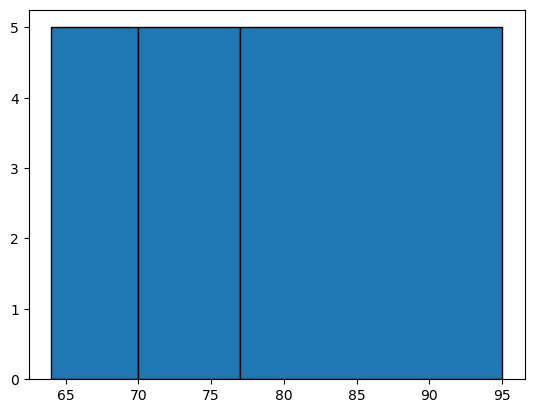

Bin boundaries and frequency per bin:
Bins: [64. 70. 77. 95.]
Frequencies: [5. 5. 5.]


In [35]:
# Demo data
data = np.array([68, 65, 64, 69, 70, 72, 75, 77, 74, 71, 95, 80, 83, 81, 66])

# function for equal frequency binning
def equal_frequency_bins(x, nbin):
    nlen = len(x)
    return np.interp(np.linspace(0, nlen, nbin + 1), np.arange(nlen), np.sort(x))

# create histgram for euqal_frequncy_bins
n, bins, patches = plt.hist(data, equal_frequency_bins(data, 3), edgecolor='black')
plt.show()

# Display the doudaries and bins
print("Bin boundaries and frequency per bin:")
print("Bins:", bins)
print("Frequencies:", n)